## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA2.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)
df_EA

Coord  Winner  Fitness  GameTime  Score  deffScore  \
Evolution Name                                                                 
0         EA191  <3468, 5, 958>   False        1       515      0          0   
          EA189  <3468, 5, 958>   False        1       497      0          0   
          EA181  <3468, 5, 958>   False        1       542      0          0   
          EA163  <3468, 5, 958>   False        1       558      0          0   
          EA153  <3468, 5, 958>   False        1       557      0          0   
...                         ...     ...      ...       ...    ...        ...   
69        EA52   <3468, 5, 958>    True      307       507    300        -10   
          EA42   <3468, 5, 958>    True      363       643    400        -50   
          EA30   <3468, 5, 958>   False      251       723    460       -210   
          EA35   <3468, 5, 958>    True      239       443    200          0   
          EA27   <3468, 5, 958>    True      323       611    320        -10   

                 suppScore  townLifeDeviation  deff-ConquerRadius  \
Evolution Name                                                      
0         EA191          1              50.00                 621   
          EA189          1              50.00                 683   
          EA181          1              50.00                2014   
          EA163          1              50.00                3188   
          EA153          1              50.00                2037   
...                    ...                ...                 ...   
69        EA52          17               5.48                2649   
          EA42          13               7.18                2886   
          EA30           1              50.00                2856   
          EA35          39               2.46                2686   
          EA27          13               7.05                2711   

                 deff-AttackMinLife  ...  off-SupportMinCap  \
Evolution Name                       ...                      
0         EA191                  71  ...                 68   
          EA189                  96  ...                 59   
          EA181                  33  ...                 15   
          EA163                  65  ...                 78   
          EA153                  80  ...                 83   
...                             ...  ...                ...   
69        EA52                   21  ...                 55   
          EA42                   17  ...                 49   
          EA30                   16  ...                 62   
          EA35                   21  ...                 63   
          EA27                   21  ...                 58   

                 supp-ConquerRadius  supp-AttackMinLife  supp-SupportRadius  \
Evolution Name                                                                
0         EA191                3004                  27                1969   
          EA189                2370                  78                1684   
          EA181                 712                  51                3768   
          EA163                2775                  88                1472   
          EA153                2966                  67                 708   
...                             ...                 ...                 ...   
69        EA52                 1751                  27                1938   
          EA42                 2628                  15                1407   
          EA30                 2578                  12                1486   
          EA35                 2014                  22                1592   
          EA27                 2539                  18                1291   

                 supp-SupportMaxCap  supp-SupportMinCap  SupportTownRatio  \
Evolution Name                                                              
0         EA191                  32                  94                36   
        

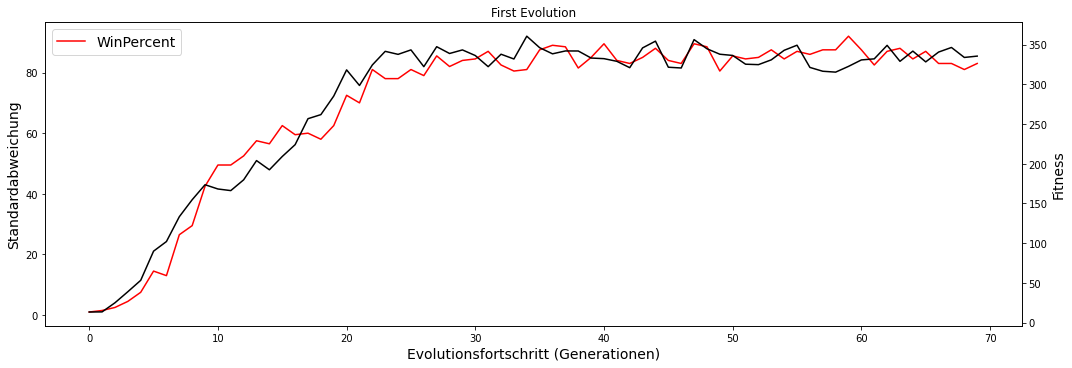

In [94]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='red', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["deff-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["off-ConquerRadius"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(df_Mean["supp-ConquerRadius"].values, color='green', label='Fitness')
#Fitness, = ax1.plot(df_Mean["deffScore"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(df_Mean["townLifeDeviation"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["deff-ConquerRadius"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off-ConquerRadius"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-ConquerRadius"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(df_Mean["GameTime"].values, color=color)
ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()